In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt 
from IPython.display import HTML 

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
IMAGE_SIZE = 350,192
CHANNELS = 3

In [3]:
#create a variable of ImageDataGenerator with it's parameters
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

#load the iamges from directory 
train_generator = train_datagen.flow_from_directory(
    'dataset/train', #the path of the diractory 
    target_size=(IMAGE_SIZE),
    batch_size=32, #stanserd size
    class_mode='sparse'
)

Found 1128 images belonging to 2 classes.


In [4]:
train_generator.class_indices

{'diseased': 0, 'healthy': 1}

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['diseased', 'healthy']

In [6]:
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.5116835  0.5156051  0.53521293]
  [0.50980395 0.5137255  0.53333336]
  [0.5176083  0.52152985 0.54113775]
  ...
  [0.40241727 0.386731   0.39065257]
  [0.403608   0.3879217  0.39184326]
  [0.4047987  0.3891124  0.39303398]]

 [[0.51227885 0.5162004  0.53580827]
  [0.50980395 0.5137255  0.53333336]
  [0.5152269  0.51914847 0.5387563 ]
  ...
  [0.4229645  0.40727824 0.4111998 ]
  [0.43070397 0.4150177  0.41893926]
  [0.43844345 0.42275715 0.42667872]]

 [[0.5128742  0.51679575 0.5364036 ]
  [0.50980395 0.5137255  0.53333336]
  [0.5128455  0.5167671  0.5363749 ]
  ...
  [0.4532349  0.43754864 0.4414702 ]
  [0.4502582  0.43457192 0.4384935 ]
  [0.44728148 0.4315952  0.43551677]]

 ...

 [[0.2736501  0.27757168 0.29325795]
  [0.27543616 0.27935773 0.295044  ]
  [0.2772222  0.28114375 0.29683003]
  ...
  [0.29034162 0.29818475 0.29426318]
  [0.28940633 0.29724947 0.2933279 ]
  [0.28858763 0.29643077 0.2925092 ]]

 [[0.28984317 0.29376474 0.309451  ]
  [0.2928199  0.29674146 0.31242773]


In [7]:
#create a variable of ImageDataGenerator with it's parameters
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

#load the iamges from directory 
validation_generator = validation_datagen.flow_from_directory(
    'dataset/val', #the path of the diractory 
    target_size=(IMAGE_SIZE),
    batch_size=32, #stanserd size
    class_mode='sparse'
)

Found 188 images belonging to 2 classes.


In [8]:
#create a variable of ImageDataGenerator with it's parameters
test_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

#load the iamges from directory 
test_generator = test_datagen.flow_from_directory(
    'dataset/test', #the path of the diractory 
    target_size=(IMAGE_SIZE),
    batch_size=32, #stanserd size
    class_mode='sparse'
)

Found 564 images belonging to 2 classes.


In [9]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.41960788 0.41176474 0.5686275 ]
  [0.43640214 0.42184126 0.5619098 ]
  [0.43921572 0.42352945 0.56078434]
  ...
  [0.46488637 0.45312163 0.331553  ]
  [0.46729636 0.45553166 0.33396304]
  [0.4697064  0.45794168 0.33637306]]

 [[0.41960788 0.41176474 0.5686275 ]
  [0.4333896  0.42003375 0.5631148 ]
  [0.43921572 0.42352945 0.56078434]
  ...
  [0.48528543 0.47352073 0.3519521 ]
  [0.48890045 0.47713575 0.35556713]
  [0.4925155  0.4807508  0.35918215]]

 [[0.42186308 0.41401994 0.5708827 ]
  [0.43166527 0.41951442 0.56560796]
  [0.4410751  0.4253888  0.5626437 ]
  ...
  [0.5133414  0.5015767  0.38000807]
  [0.5181615  0.5063968  0.38482812]
  [0.5229815  0.5112168  0.38964817]]

 ...

 [[0.3275336  0.30212602 0.45678017]
  [0.3269311  0.300921   0.45738268]
  [0.3263286  0.299716   0.45798516]
  ...
  [0.5254902  0.50980395 0.60784316]
  [0.5266666  0.5109803  0.6090195 ]
  [0.5294118  0.5137255  0.6117647 ]]

 [[0.3254902  0.29803923 0.45882356]
  [0.3254902  0.29803923 0.45882356]


In [10]:
#BUILD CNN -- building the model
#Will have different layers for the model 

input_shape = (350,192, CHANNELS ) # thats it our format for our input 

n_classes = 2 # number of classes is 2 


model= models.Sequential ([

    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size =  (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes , activation = 'softmax') #softmax activation function will  normalize the probility of my classes 

])


In [11]:
#print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 348, 190, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 174, 95, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 172, 93, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 86, 46, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 84, 44, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 42, 22, 64)       0

In [12]:
 #COMPILE USING OPTIMIZER

model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [13]:
#total NO. in train images 1128 is x
1128/32

35.25

In [14]:
#total No. in validation images is y 
188/32

5.875

In [15]:
#TRAIN MY NETWORK 
#model fit 

history = model.fit(
    train_generator,
    steps_per_epoch = 35,
    batch_size = 32,
    validation_data = validation_generator,
    validation_steps=5,
    verbose=1,
    epochs=30
)

Epoch 1/30
35/35 [==============================] - 373s 10s/step - loss: 0.6397 - accuracy: 0.5739 - val_loss: 0.5079 - val_accuracy: 0.7625
Epoch 2/30
35/35 [==============================] - 421s 12s/step - loss: 0.4735 - accuracy: 0.7692 - val_loss: 0.5511 - val_accuracy: 0.6938
Epoch 3/30
35/35 [==============================] - 396s 11s/step - loss: 0.4160 - accuracy: 0.8111 - val_loss: 0.3949 - val_accuracy: 0.8062
Epoch 4/30
35/35 [==============================] - 277s 8s/step - loss: 0.3479 - accuracy: 0.8586 - val_loss: 0.3474 - val_accuracy: 0.8562
Epoch 5/30
35/35 [==============================] - 178s 5s/step - loss: 0.3586 - accuracy: 0.8440 - val_loss: 0.3715 - val_accuracy: 0.8500
Epoch 6/30
35/35 [==============================] - 373s 10s/step - loss: 0.2106 - accuracy: 0.9170 - val_loss: 0.1987 - val_accuracy: 0.9500
Epoch 7/30
35/35 [==============================] - 404s 12s/step - loss: 0.2287 - accuracy: 0.9033 - val_loss: 0.1910 - val_accuracy: 0.9500
Epoch 8/

In [16]:
#TEST THE MODEL 
scores = model.evaluate(test_generator)

18/18 [==============================] - 64s 4s/step - loss: 0.0963 - accuracy: 0.9699


In [17]:
#Scores is a list containing loss and accuracy value
scores

[0.09632444381713867, 0.9698581695556641]

In [18]:
#plotting the Accuracy and loss curves 
history

In [19]:
#The params attribute of the history object provides access to the parameters or configuration settings that were used during the training. 
history.params

{'verbose': 1, 'epochs': 30, 'steps': 35}

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [21]:
#loss, accuracy, validation loss .. are a Python list contaning values of loss, accuracy .. at the end of each epoch

type(history.history['loss'])

list

In [22]:
len(history.history['loss'])

30

In [23]:
#will show loss for the first 5 epochs
history.history['loss'][:5]

[0.6396796107292175,
 0.4735495448112488,
 0.41602659225463867,
 0.3478985130786896,
 0.3585748076438904]

In [24]:
# Will put them into variables 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [25]:
val_acc

[0.762499988079071,
 0.6937500238418579,
 0.8062499761581421,
 0.856249988079071,
 0.8500000238418579,
 0.949999988079071,
 0.949999988079071,
 0.90625,
 0.8687499761581421,
 0.9375,
 0.9375,
 0.9437500238418579,
 0.9750000238418579,
 0.887499988079071,
 0.956250011920929,
 0.981249988079071,
 0.949999988079071,
 0.9437500238418579,
 0.981249988079071,
 0.987500011920929,
 0.981249988079071,
 0.9750000238418579,
 0.987500011920929,
 0.9750000238418579,
 0.981249988079071,
 0.987500011920929,
 0.987500011920929,
 0.9750000238418579,
 0.981249988079071,
 0.96875]

In [26]:
acc

[0.5739051103591919,
 0.7691605687141418,
 0.8111313581466675,
 0.8585766553878784,
 0.8439781069755554,
 0.9169707894325256,
 0.9032846689224243,
 0.8987226486206055,
 0.9288321137428284,
 0.9379562139511108,
 0.9224452376365662,
 0.9461678862571716,
 0.959854006767273,
 0.9507299065589905,
 0.9552919864654541,
 0.974452555179596,
 0.9507299065589905,
 0.9644160866737366,
 0.9717153310775757,
 0.9735401272773743,
 0.9698905348777771,
 0.9808394312858582,
 0.9762773513793945,
 0.9808394312858582,
 0.9767857193946838,
 0.9479926824569702,
 0.9717153310775757,
 0.989051103591919,
 0.9844890236854553,
 0.9908758997917175]

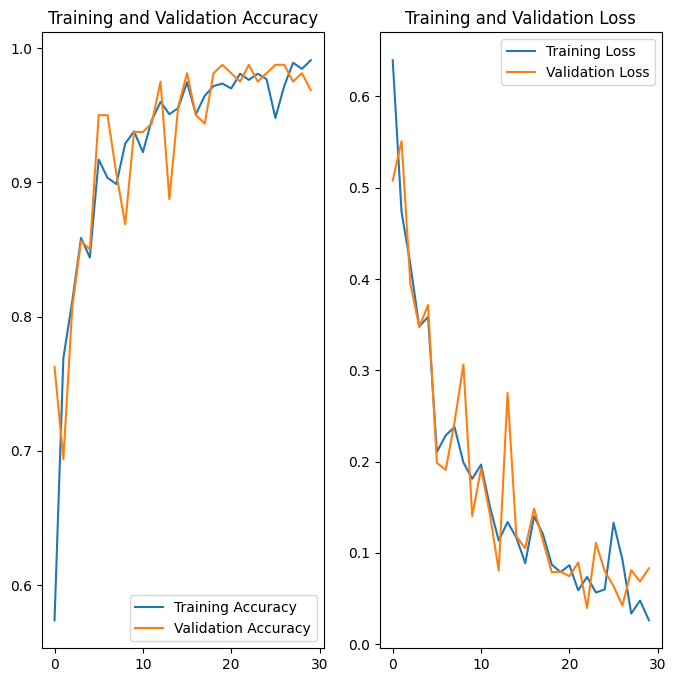

In [27]:
#PLOT TRAINING AND VALIDATION ACCURACY 

EPOCH = 30 

plt.figure (figsize =(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range (EPOCH), acc, label = 'Training Accuracy')
plt.plot(range (EPOCH), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title ('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range (EPOCH), loss, label = 'Training Loss')
plt.plot(range (EPOCH), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title ('Training and Validation Loss')
plt.show()

first image to predict
actual label: diseased
1/1 [==============================] - 2s 2s/step
predected label: diseased


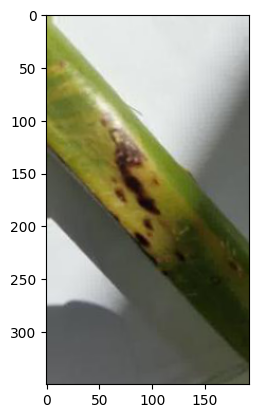

In [28]:
#Run predictuion on a sample image 
import numpy as np 

for image_batch, labels_batch in test_generator: 
    first_image = image_batch[0]
    first_label = int(labels_batch[0])
    
    print ("first image to predict")
    plt.imshow(first_image)
    print ("actual label:", class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predected label:", class_names[np.argmax(batch_prediction[0])])
    
    break

In [29]:
#Write a function for inference 
#SIMPLE FUNCTION: TAKING MODEL AND IMAGE AS INPUT AND TELLING WHAT THE PREDICTED CLASS AND CONFIDENCE 

def predict (model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0) # create a batch 

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round (100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 80ms/step


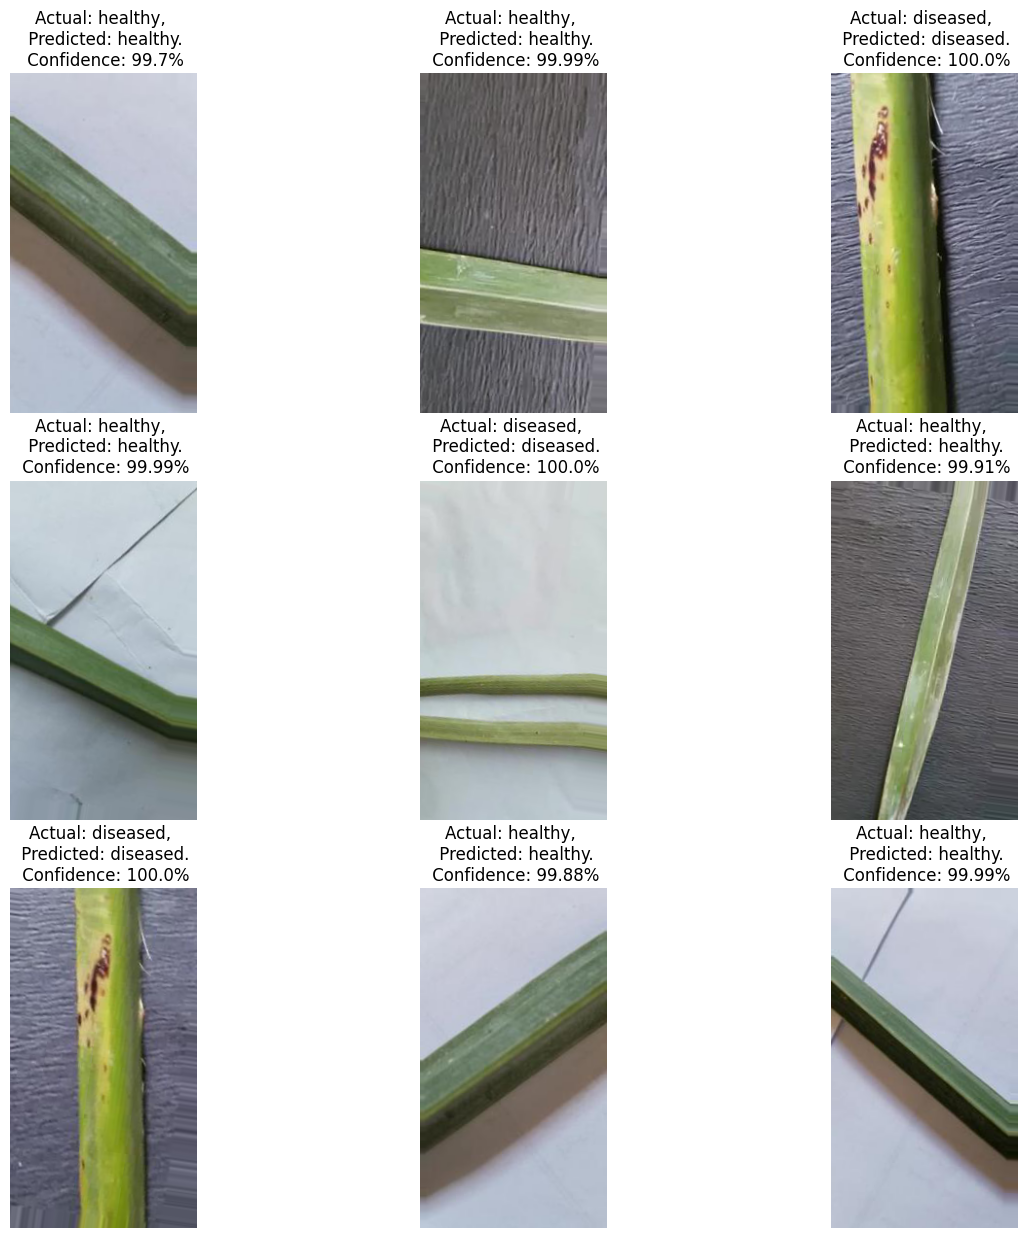

In [32]:
#RUN THE PREDICTION
#Run inference on few sample images 

plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot (3, 3, i +1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]
        
        plt.title (f"Actual: {actual_class}, \n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
        
    break 

In [33]:
#Saving the Model 
#save the model in h5 format 
model.save("../DatePlamTreeDiseases.h5")